Sagaljyot Singh (4364571)

In [ ]:
pip install --upgrade firebase-admin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.3/120.3 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: pyjwt
    Found existing installation: PyJWT 2.3.0
    Uninstalling PyJWT-2.3.0:
      Successfully uninstalled PyJWT-2.3.0
  Attempting uninstall: firebase-admin
    Found existing installation: firebase-admin 5.3.0
    Uninstalling firebase-admin-5.3.0:
      Successfully uninstalled firebase-admin-5.3.0


In [ ]:
pip install --upgrade google-cloud-storage

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 186.8/186.8 kB 9.2 MB/s eta 0:00:00
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.17.3
    Uninstalling google-auth-2.17.3:
      Successfully uninstalled google-auth-2.17.3
  Attempting uninstall: google-cloud-storage
    Found existing installation: google-cloud-storage 2.8.0
    Uninstalling google-cloud-storage-2.8.0:
      Successfully uninstalled google-cloud-storage-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
google-colab 1.0.0 requires google-auth==2.17.3, but you have google-auth 2.27.0 which is incompatible.


In [ ]:
pip install --upgrade google-cloud-speech

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.3/284.3 kB 5.2 MB/s eta 0:00:00


In [ ]:
from google.cloud import storage

In [ ]:
import os

In [ ]:
import pprint

In [ ]:
from google.cloud import language_v1

In [ ]:
from google.cloud import speech

In [ ]:
from datetime import datetime

In [ ]:
import pandas as pd

In [ ]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore


In [ ]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/content/drive/MyDrive/Colab Notebooks/AI in Marketing/Audio sentiment analysis/admn5015-winter24-ic-cfbb3c8b4126.json"

In [ ]:
def list_blobs(bucket_name):
    """Lists all the blobs in the bucket."""
    # bucket_name = "your-bucket-name"

    storage_client = storage.Client()

    # Note: Client.list_blobs requires at least package version 1.17.0.
    blobs = storage_client.list_blobs(bucket_name)
    return(blobs)
    # # Note: The call returns a response only when the iterator is consumed.


In [ ]:
def extract_audio_gcs(gcs_uri):
    """Asynchronously transcribes the audio file specified by the gcs_uri."""

    client = speech.SpeechClient()

    audio = speech.RecognitionAudio(uri=gcs_uri)
    config = speech.RecognitionConfig(
        encoding=speech.RecognitionConfig.AudioEncoding.LINEAR16,
        audio_channel_count=2,
        language_code="en-US",
    )

    operation = client.long_running_recognize(config=config, audio=audio)

    print("Waiting for operation to complete...")
    response = operation.result(timeout=100)

    return response

In [ ]:
def sentiments(text):
  # Instantiates a client
  client = language_v1.LanguageServiceClient()
  document = language_v1.types.Document(content=text, type_=language_v1.types.Document.Type.PLAIN_TEXT)
  # Detects the sentiment of the text
  sentiment = client.analyze_sentiment(request={"document": document}).document_sentiment
  return(sentiment)

In [ ]:
bucket_name = "project_admn5015_audio_sentiments"
blobs = list_blobs(bucket_name)
for blob in blobs:
  print(blob.name)

Audio 1.wav
Audio 2.wav


In [ ]:

# Use a service account.
cred = credentials.Certificate('/content/drive/MyDrive/Colab Notebooks/AI in Marketing/Audio sentiment analysis/admn5015-winter24-ic-cfbb3c8b4126.json')

app = firebase_admin.initialize_app(cred)

db = firestore.client()

In [ ]:

bucket_name = "project_admn5015_audio_sentiments"
blobs = list_blobs(bucket_name)
for blob in blobs:
  filename = blob.name
  # Extract audio from file
  gcs_uri = "gs://" + bucket_name + "/" + blob.name
  response = extract_audio_gcs(gcs_uri=gcs_uri)
  for i in range(len(response.results)):
    sen = i+1
    text = response.results[i].alternatives[0].transcript
    sentiment = sentiments(text)
    senti = sentiment.score
    magni = sentiment.magnitude
    doc_ref = db.collection("project").document(f'{filename}_{i}')
    doc_ref.set({"1.wav_filename": filename, "2.sentence_number": sen, "3.sentence_text": text, "4.sentiment": senti,
                 "5.magnitude": magni, "6.transcription_date": datetime.now()})

Waiting for operation to complete...
Waiting for operation to complete...


In [ ]:
collection_ref = db.collection("project")

In [ ]:
collection_ref

In [ ]:
document_data = []

# Iterate over documents in the collection
for doc in collection_ref.stream():
    document_data.append(doc.to_dict())

# Create a Pandas DataFrame from the retrieved data
data_df = pd.DataFrame(document_data)

# Now you have your Firestore data stored in a Pandas DataFrame
data_df.head()

,5.magnitude,6.transcription_date,1.wav_filename,3.sentence_text,4.sentiment,2.sentence_number
0,0.1,2024-02-03 22:16:28.579817+00:00,Audio 1.wav,Packer scarves how may I help you,-0.1,1
1,0.4,2024-02-03 22:16:29.003496+00:00,Audio 1.wav,course online for my way to the church of the...,-0.4,2
2,0.0,2024-02-03 22:16:32.675093+00:00,Audio 1.wav,what ZIP code are you located in,0.0,11
3,0.5,2024-02-03 22:16:33.153482+00:00,Audio 1.wav,it appears that we do not I'm sorry that we d...,-0.5,12
4,0.1,2024-02-03 22:16:33.620134+00:00,Audio 1.wav,Charlie Johnson Charlie Johnson is that Johnson,0.1,13


In [ ]:
df = data_df.reindex(sorted(data_df.columns), axis=1)
df = df.sort_values(by=['1.wav_filename','2.sentence_number'], ascending=True)
df.head()

,1.wav_filename,2.sentence_number,3.sentence_text,4.sentiment,5.magnitude,6.transcription_date
0,Audio 1.wav,1,Packer scarves how may I help you,-0.1,0.1,2024-02-03 22:16:28.579817+00:00
1,Audio 1.wav,2,course online for my way to the church of the...,-0.4,0.4,2024-02-03 22:16:29.003496+00:00
6,Audio 1.wav,3,oh I'm so sorry sir,-0.7,0.7,2024-02-03 22:16:29.397876+00:00
7,Audio 1.wav,4,search for birthday which is tonight and now ...,-0.1,0.1,2024-02-03 22:16:29.822979+00:00
8,Audio 1.wav,5,call The New Yorker I think,0.0,0.0,2024-02-03 22:16:30.225964+00:00


In [ ]:
df

,1.wav_filename,2.sentence_number,3.sentence_text,4.sentiment,5.magnitude,6.transcription_date
0,Audio 1.wav,1,Packer scarves how may I help you,-0.1,0.1,2024-02-03 22:16:28.579817+00:00
1,Audio 1.wav,2,course online for my way to the church of the...,-0.4,0.4,2024-02-03 22:16:29.003496+00:00
6,Audio 1.wav,3,oh I'm so sorry sir,-0.7,0.7,2024-02-03 22:16:29.397876+00:00
7,Audio 1.wav,4,search for birthday which is tonight and now ...,-0.1,0.1,2024-02-03 22:16:29.822979+00:00
8,Audio 1.wav,5,call The New Yorker I think,0.0,0.0,2024-02-03 22:16:30.225964+00:00
9,Audio 1.wav,6,clue the one that ship was light blue I wante...,0.0,0.0,2024-02-03 22:16:30.629216+00:00
10,Audio 1.wav,7,did you want navy blue or royal blue,0.0,0.0,2024-02-03 22:16:31.039827+00:00
11,Audio 1.wav,8,what's the difference there,-0.2,0.2,2024-02-03 22:16:31.466810+00:00
12,Audio 1.wav,9,the royal blue is a bit brighter,0.0,0.0,2024-02-03 22:16:31.877790+00:00
13,Audio 1.wav,10,that's the one I want,0.8,0.8,2024-02-03 22:16:32.274418+00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

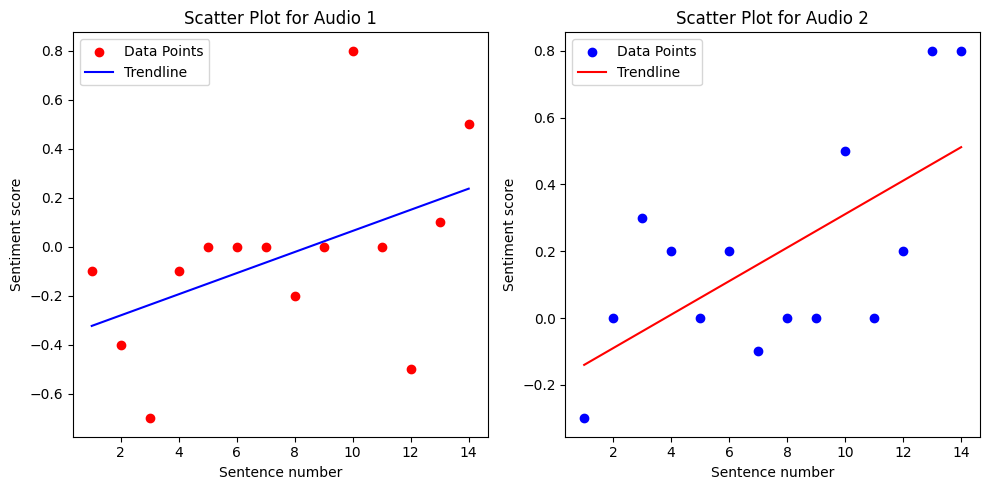

In [ ]:
plt.figure(figsize=(10, 5))

# Scatter plot 1
plt.subplot(1, 2, 1)
plt.scatter(df.loc[df['1.wav_filename'] == 'Audio 1.wav', '2.sentence_number'], df.loc[df['1.wav_filename'] == 'Audio 1.wav', '4.sentiment'], color='red', label='Data Points')
plt.title('Scatter Plot for Audio 1')
plt.xlabel('Sentence number')
plt.ylabel('Sentiment score')

# Calculate and plot trendline for Scatter Plot 1
x1 = df.loc[df['1.wav_filename'] == 'Audio 1.wav', '2.sentence_number']
y1 = df.loc[df['1.wav_filename'] == 'Audio 1.wav', '4.sentiment']
z1 = np.polyfit(x1, y1, 1)
p1 = np.poly1d(z1)
plt.plot(x1, p1(x1), color='blue', label='Trendline')

plt.legend()

# Scatter plot 2
plt.subplot(1, 2, 2)
plt.scatter(df.loc[df['1.wav_filename'] == 'Audio 2.wav', '2.sentence_number'], df.loc[df['1.wav_filename'] == 'Audio 2.wav', '4.sentiment'], color='blue', label='Data Points')
plt.title('Scatter Plot for Audio 2')
plt.xlabel('Sentence number')
plt.ylabel('Sentiment score')

# Calculate and plot trendline for Scatter Plot 2
x2 = df.loc[df['1.wav_filename'] == 'Audio 2.wav', '2.sentence_number']
y2 = df.loc[df['1.wav_filename'] == 'Audio 2.wav', '4.sentiment']
z2 = np.polyfit(x2, y2, 1)
p2 = np.poly1d(z2)
plt.plot(x2, p2(x2), color='red', label='Trendline')

plt.legend()

plt.tight_layout()
plt.show()

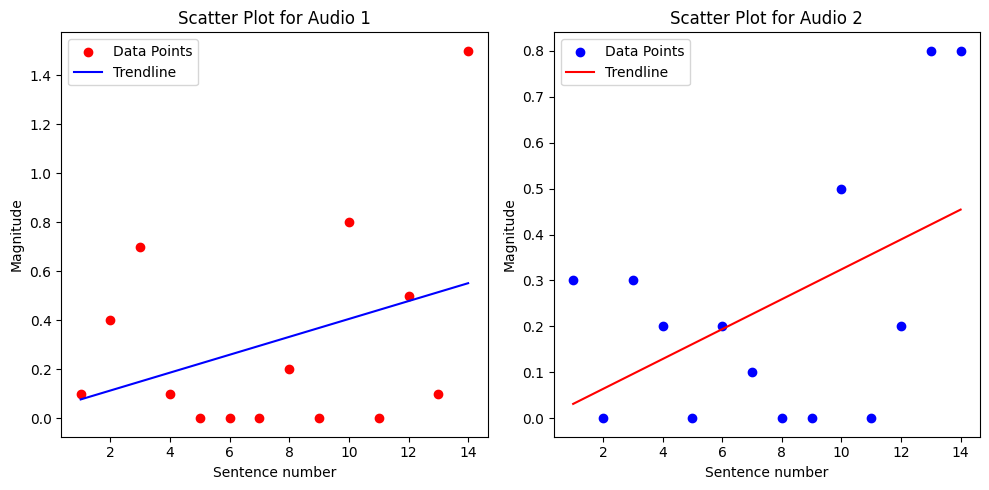

In [ ]:
plt.figure(figsize=(10, 5))

# Scatter plot 1
plt.subplot(1, 2, 1)
plt.scatter(df.loc[df['1.wav_filename'] == 'Audio 1.wav', '2.sentence_number'], df.loc[df['1.wav_filename'] == 'Audio 1.wav', '5.magnitude'], color='red', label='Data Points')
plt.title('Scatter Plot for Audio 1')
plt.xlabel('Sentence number')
plt.ylabel('Magnitude')

# Calculate and plot trendline for Scatter Plot 1
x1 = df.loc[df['1.wav_filename'] == 'Audio 1.wav', '2.sentence_number']
y1 = df.loc[df['1.wav_filename'] == 'Audio 1.wav', '5.magnitude']
z1 = np.polyfit(x1, y1, 1)
p1 = np.poly1d(z1)
plt.plot(x1, p1(x1), color='blue', label='Trendline')

plt.legend()

# Scatter plot 2
plt.subplot(1, 2, 2)
plt.scatter(df.loc[df['1.wav_filename'] == 'Audio 2.wav', '2.sentence_number'], df.loc[df['1.wav_filename'] == 'Audio 2.wav', '5.magnitude'], color='blue', label='Data Points')
plt.title('Scatter Plot for Audio 2')
plt.xlabel('Sentence number')
plt.ylabel('Magnitude')

# Calculate and plot trendline for Scatter Plot 2
x2 = df.loc[df['1.wav_filename'] == 'Audio 2.wav', '2.sentence_number']
y2 = df.loc[df['1.wav_filename'] == 'Audio 2.wav', '5.magnitude']
z2 = np.polyfit(x2, y2, 1)
p2 = np.poly1d(z2)
plt.plot(x2, p2(x2), color='red', label='Trendline')

plt.legend()

plt.tight_layout()
plt.show()

In this project, I chose two audios (Audio 1 is a E-commerce customer care call recording, and Audio 2 is Equipment Supply business customer care call recording), and tried to convert them to text using google cloud A.I. services. After converting to text, I ran a sentient analysis on both the texts to observe the trend of sentiment score and sentiment magnitude for both the audios. From the visualization above, it can be seen that both the audios have a positive trend for sentiment score and magnitude, which means that the calls ended on a happy note.